In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


### Importation and Visualisation

In [2]:
image = cv2.imread("1.jpg")

In [ ]:
image.shape

In [3]:
cv2.imshow('Original image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
## Turn to gray 

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [5]:
gray.shape

(300, 400)

In [6]:
cv2.imshow('Grayscale image',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Fast Algorithm

##### Extract 16 pixels

In [42]:
def get_circle(im, p):
    point = []
    mask = np.zeros(im.shape)
    cv2.circle(mask, center=p, radius=3, color=255, thickness=1)
    where = np.where(mask == 255)  
    for i, j in zip(where[0], where[1]):
        z = (i, j)
        point.append(z)
    
    return point


In [44]:
def get_circle(im, p):
    point = [(p[0]-3, p[1]),(p[0]-3, p[1]+1), (p[0]-2, p[1]+2), (p[0]-1, p[1]+3), (p[0], p[1]+3), (p[0]+1, p[1]+3), (p[0]+2, p[1]+2), (p[0]+3, p[1]+1),(p[0]+3, p[1]), (p[0]+3, p[1]-1), (p[0]+2, p[1]-2), (p[0]+1, p[1]-3), (p[0], p[1]-3), (p[0]-1, p[1]-3), (p[0]-2, p[1]-2), (p[0]-3, p[1]-1) ]
    
    return point

#### classification mask 

In [15]:
## -1:darker,  1: lighter,  0: same 


def classification(image,circle, p, t):
    points= []

    for point in circle: 
        if (0<point[0]< image.shape[0] and 0<point[1]< image.shape[1] ):
            if image[point] < image[p] - t:
                points.append(-1) 
            elif image[point] > image[p] + t:
                points.append(1) 
            else :
                points.append(0)
    
    while len(points)!=16:
        points.append(0)
        
    return points

#### contiguous points

In [16]:
## True: N contiguous points     False: otherwise

def contiguous(N, List):
    for i in range(len(List)):
        sub = []
        if i< len(List)-N+1:
            
            sub = List[i:N+i]
            if sub[0]!= 0 and sub.count(sub[0]) == len(sub):
                
                return True
    return False
        

#### Final algorithm

In [22]:
def fast(image, N, t):
    interest_x = []
    interest_y = []
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            p = (i,j)
            points = get_circle(image, p)
            mask = classification(image, points, p, t)
            if contiguous(N, mask):
                interest_x.append(i)
                interest_y.append(j)
    return interest_x, interest_y

### TEST

In [50]:
x = fast(gray, 12, 20)

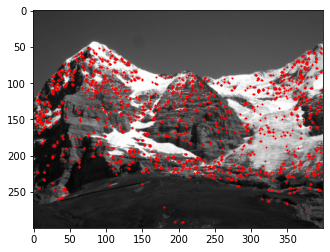

In [51]:
plt.imshow(gray, cmap='gray')
plt.scatter(x[1], x[0], c='r', s=1)
plt.show()

In [46]:
image2 = cv2.imread("2.jpg")
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

In [52]:
y = fast(gray2, 12, 20)

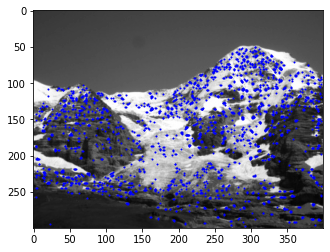

In [53]:
plt.imshow(gray2, cmap='gray')
plt.scatter(y[1], y[0], c='b', s=1)
plt.show()